# Allgemeines Analyseverfahren

# Imports

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NaN-Werte prüfen

In [28]:
df = pd.read_csv('20230828_3.3_Datensatz_Airbnb.csv')

print(df.isna().sum())

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64


# Allgemeines Analyseverfahren

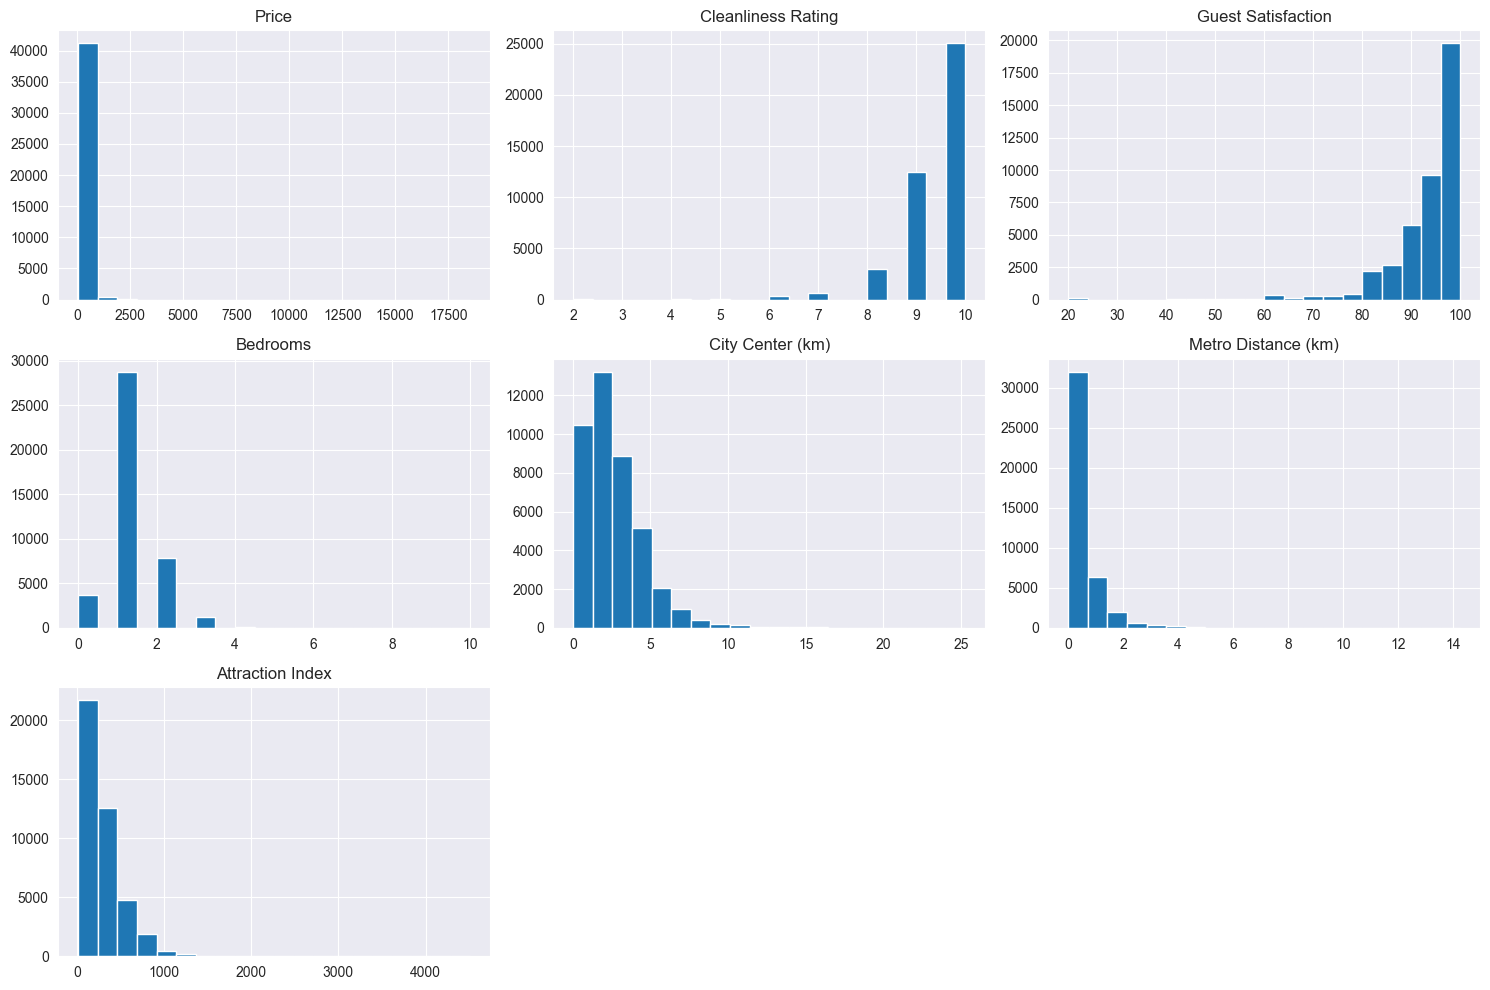

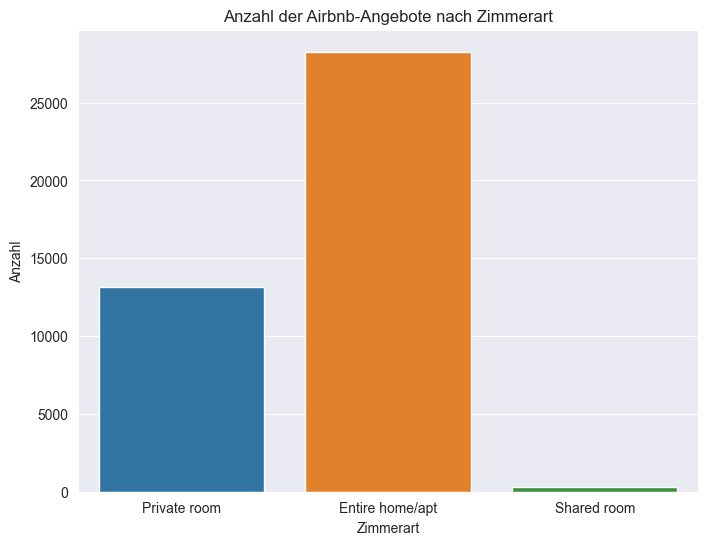

Zimmerart: Entire home/apt, Anzahl: 28264
Zimmerart: Private room, Anzahl: 13134
Zimmerart: Shared room, Anzahl: 316


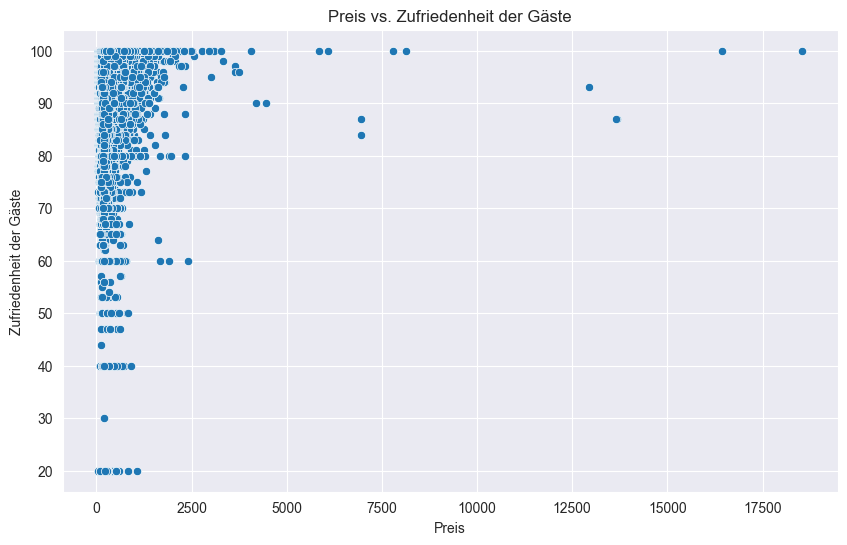

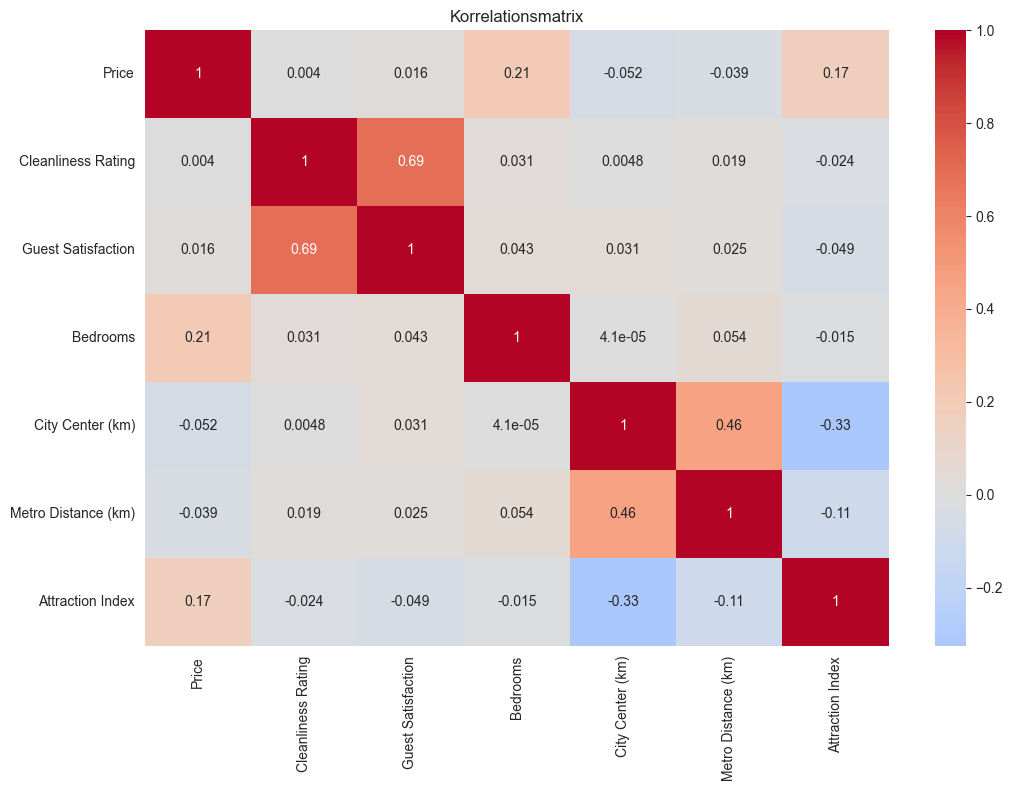

C:\Users\User\Desktop\Python_Projekte\Jupyter\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


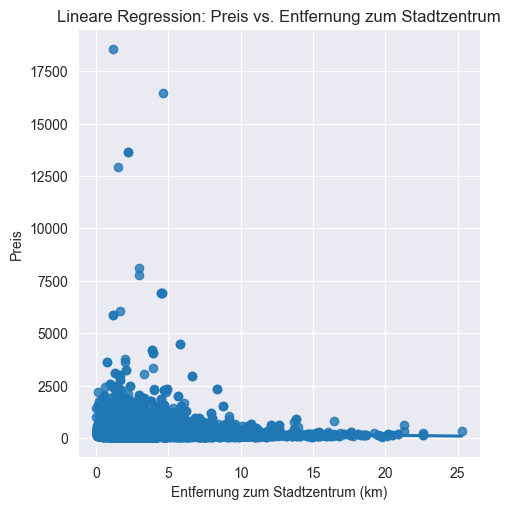

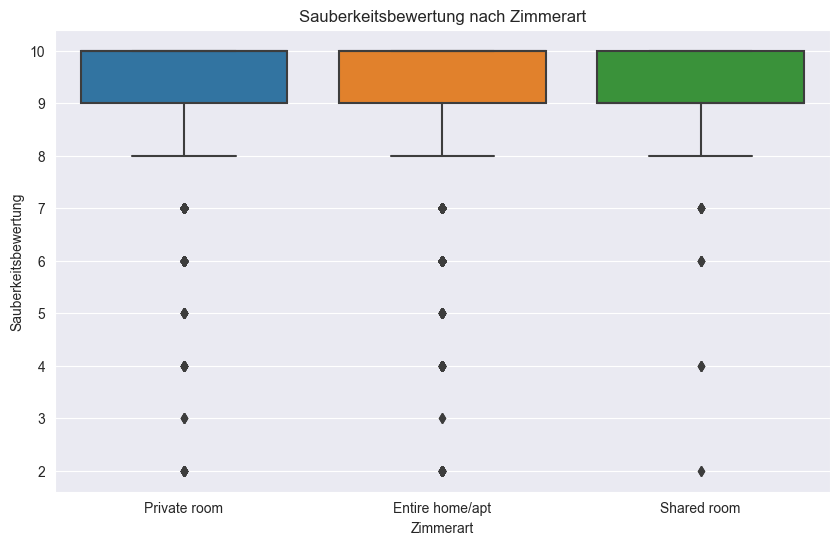

In [29]:
# Datensatz in DataFrame umwandeln
df = pd.read_csv('20230828_3.3_Datensatz_Airbnb.csv')

# EDA-Histogramme
numerical_cols = ['Price', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index']
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


# Balkendiagramm Zimmerarten
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Room Type')
plt.title('Anzahl der Airbnb-Angebote nach Zimmerart')
plt.xlabel('Zimmerart')
plt.ylabel('Anzahl')
plt.show()

# Einzelnen Zimmerarten zählen
room_type_counts = df['Room Type'].value_counts()

# Ausgabe der Anzahl
for room_type, count in room_type_counts.items():
    print(f"Zimmerart: {room_type}, Anzahl: {count}")


# Streudiagramm Preis vs. Zufriedenheit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Guest Satisfaction')
plt.title('Preis vs. Zufriedenheit der Gäste')
plt.xlabel('Preis')
plt.ylabel('Zufriedenheit der Gäste')
plt.show()

# Korrelationsmatrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix')
plt.show()

# Lineare Regression Preis vs. Entfernung zum Stadtzentrum
sns.lmplot(data=df, x='City Center (km)', y='Price')
plt.title('Lineare Regression: Preis vs. Entfernung zum Stadtzentrum')
plt.xlabel('Entfernung zum Stadtzentrum (km)')
plt.ylabel('Preis')
plt.show()

# Boxplot Sauberkeitsbewertung vs. Zimmerarten
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Room Type', y='Cleanliness Rating')
plt.title('Sauberkeitsbewertung nach Zimmerart')
plt.xlabel('Zimmerart')
plt.ylabel('Sauberkeitsbewertung')
plt.show()

#  Zusätzliche Streudiagramme

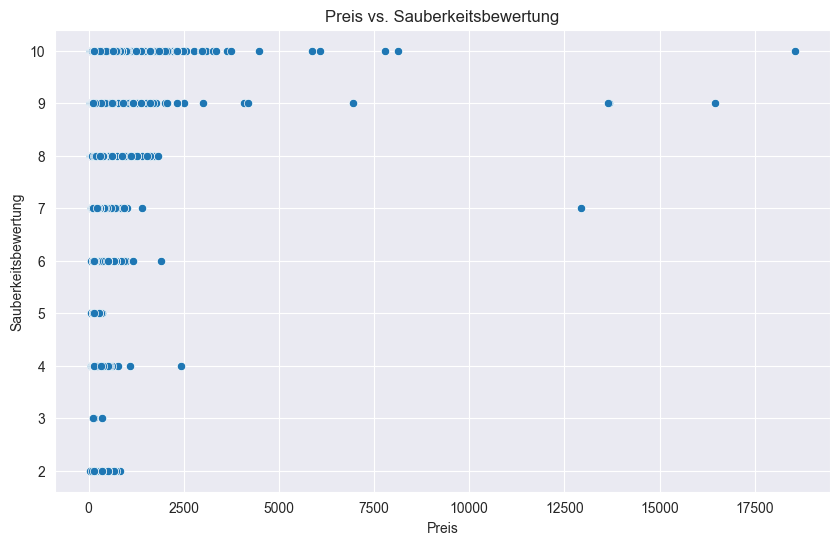

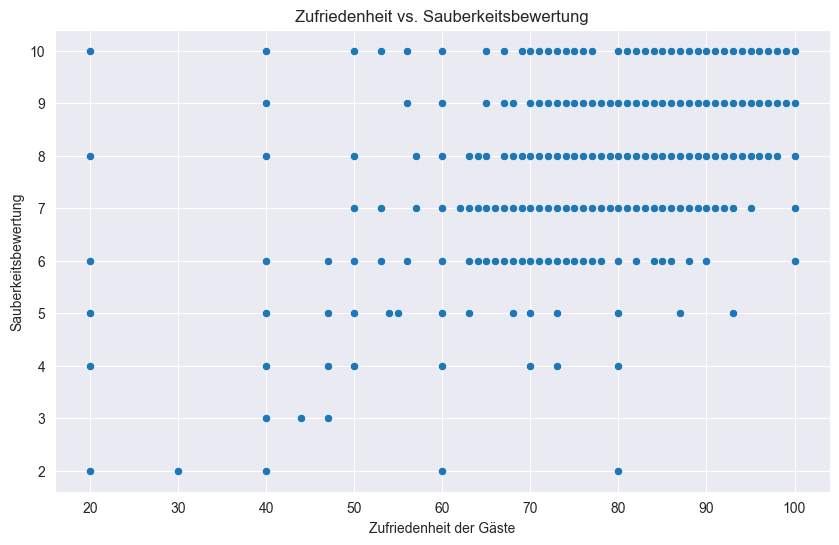

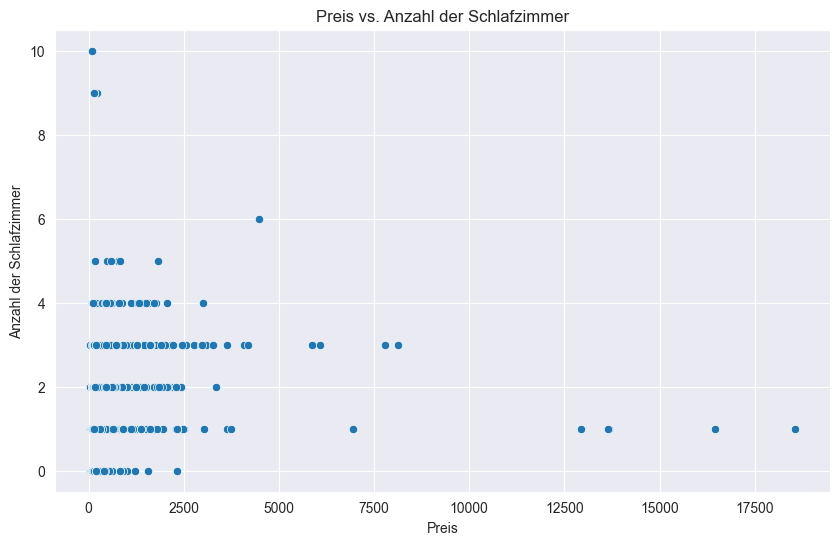

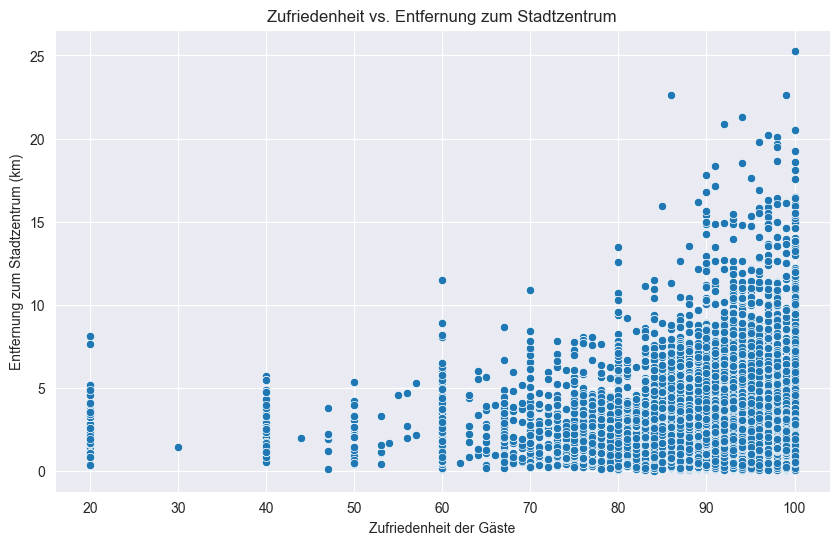

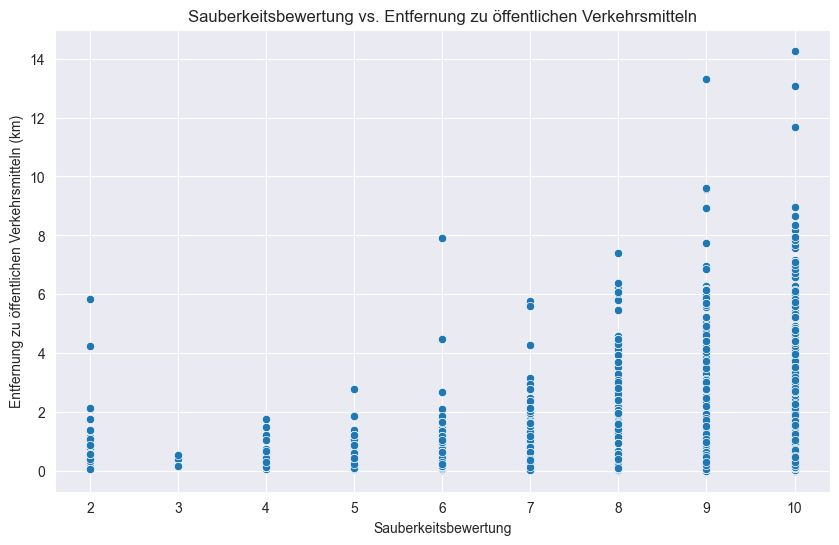

In [30]:
# Streudiagramm Preis vs. Sauberkeitsbewertung
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Cleanliness Rating')
plt.title('Preis vs. Sauberkeitsbewertung')
plt.xlabel('Preis')
plt.ylabel('Sauberkeitsbewertung')
plt.show()

# Streudiagramm Zufriedenheit vs. Sauberkeitsbewertung
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Guest Satisfaction', y='Cleanliness Rating')
plt.title('Zufriedenheit vs. Sauberkeitsbewertung')
plt.xlabel('Zufriedenheit der Gäste')
plt.ylabel('Sauberkeitsbewertung')
plt.show()

# Streudiagramm Preis vs. Anzahl der Schlafzimmer
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Bedrooms')
plt.title('Preis vs. Anzahl der Schlafzimmer')
plt.xlabel('Preis')
plt.ylabel('Anzahl der Schlafzimmer')
plt.show()

# Streudiagramm Zufriedenheit vs. Entfernung zum Stadtzentrum
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Guest Satisfaction', y='City Center (km)')
plt.title('Zufriedenheit vs. Entfernung zum Stadtzentrum')
plt.xlabel('Zufriedenheit der Gäste')
plt.ylabel('Entfernung zum Stadtzentrum (km)')
plt.show()

# Streudiagramm Sauberkeitsbewertung vs. Entfernung zu öffentlichen Verkehrsmitteln
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cleanliness Rating', y='Metro Distance (km)')
plt.title('Sauberkeitsbewertung vs. Entfernung zu öffentlichen Verkehrsmitteln')
plt.xlabel('Sauberkeitsbewertung')
plt.ylabel('Entfernung zu öffentlichen Verkehrsmitteln (km)')
plt.show()

# Zufriedenheit und Attraction Index

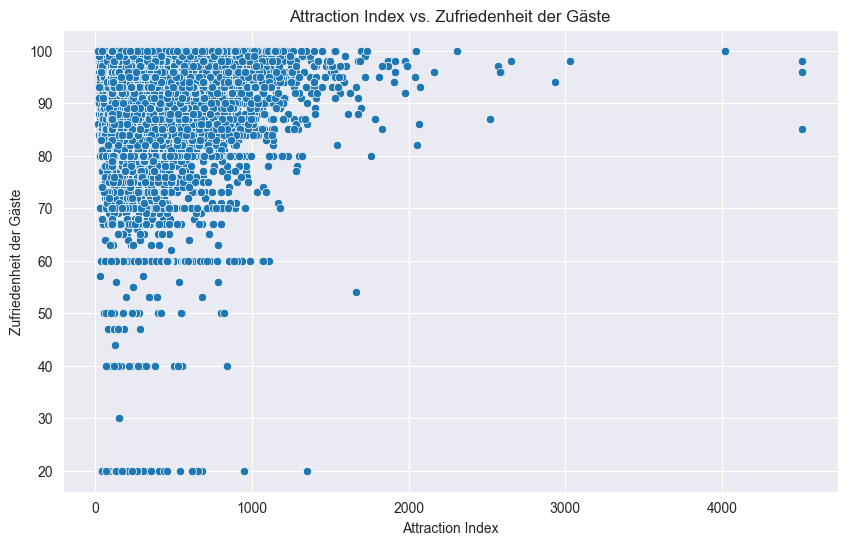

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Attraction Index', y='Guest Satisfaction')
plt.title('Attraction Index vs. Zufriedenheit der Gäste')
plt.xlabel('Attraction Index')
plt.ylabel('Zufriedenheit der Gäste')
plt.show()

# Kategorische Variationen in Zufriedenheit

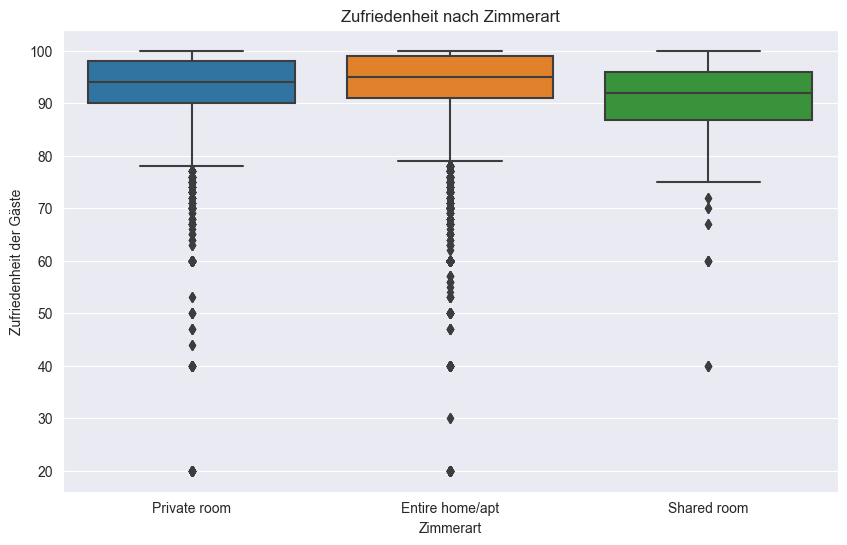

Die Zimmerart Entire home/apt hat die beste durchschnittliche Zufriedenheitsbewertung von 93.43.


In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Room Type', y='Guest Satisfaction')
plt.title('Zufriedenheit nach Zimmerart')
plt.xlabel('Zimmerart')
plt.ylabel('Zufriedenheit der Gäste')
plt.show()

# Durchschnittliche Zufriedenheitsbewertung nach Zimmerart berechnen
avg_satisfaction_by_room_type = df.groupby('Room Type')['Guest Satisfaction'].mean()

# Zimmerart mit der besten durchschnittlichen Zufriedenheitsbewertung ermitteln
best_room_type = avg_satisfaction_by_room_type.idxmax()
highest_satisfaction = avg_satisfaction_by_room_type.max()

# Ausgabe der besten Zimmerart
print(f"Die Zimmerart {best_room_type} hat die beste durchschnittliche Zufriedenheitsbewertung von {highest_satisfaction:.2f}.")

# Top Städte mit Angeboten

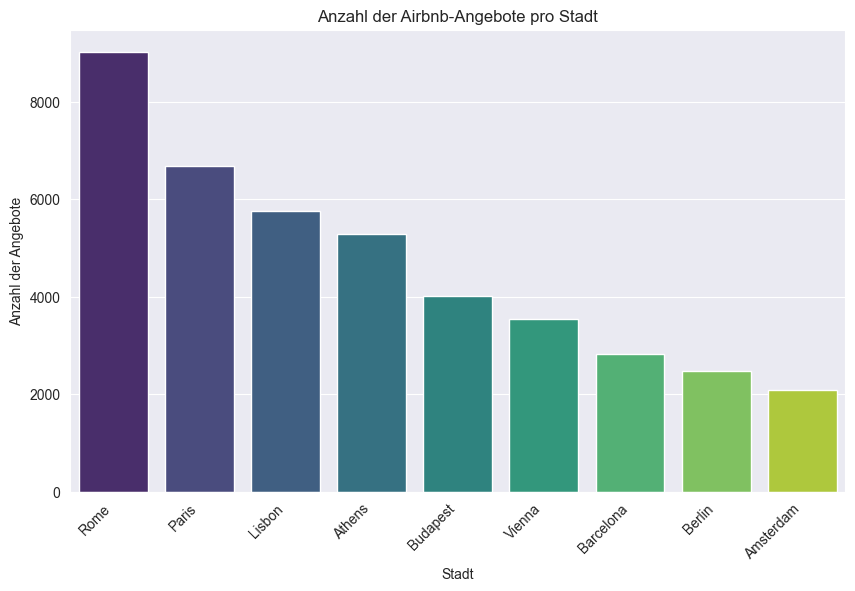

Anzahl der Unterkünfte in den Top 5 Städten:
Rome: 9027
Paris: 6688
Lisbon: 5763
Athens: 5280
Budapest: 4022


In [33]:
# Anzahl der Angebote pro Stadt zählen
city_counts = df['City'].value_counts()

# Top 5 Städte ermitteln
top_cities = city_counts.head(5)

# Balkendiagramm der Anzahl der Angebote pro Stadt
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.xlabel('Stadt')
plt.ylabel('Anzahl der Angebote')
plt.title('Anzahl der Airbnb-Angebote pro Stadt')
plt.xticks(rotation=45, ha='right')
plt.show()

# Anzahl der Unterkünfte in den Top 5 Städten anzeigen
print("Anzahl der Unterkünfte in den Top 5 Städten:")
for city in top_cities.index:
    print(f"{city}: {top_cities[city]}")

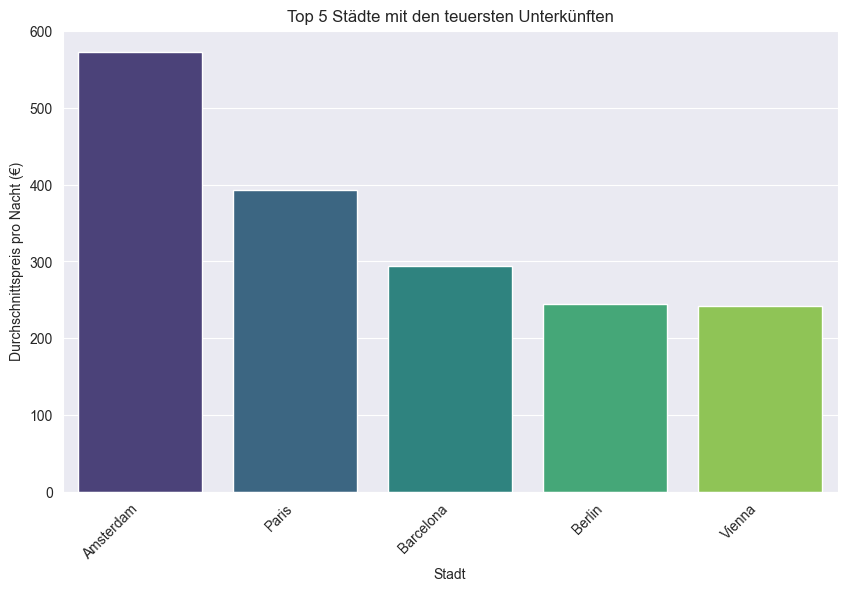

Top 5 Städte mit den teuersten Unterkünften:
Amsterdam: 573.11 € pro Nacht
Paris: 392.53 € pro Nacht
Barcelona: 293.75 € pro Nacht
Berlin: 244.58 € pro Nacht
Vienna: 241.58 € pro Nacht

In der Stadt Amsterdam gibt es die teuersten Unterkünfte mit einem Durchschnittspreis von 573.11 € pro Nacht.


In [34]:
# Durchschnittspreis pro Nacht pro Stadt berechnen
average_price_by_city = df.groupby('City')['Price'].mean()

# Top 5 Städte mit den teuersten Unterkünften ermitteln
top_cities_highest_price = average_price_by_city.sort_values(ascending=False).head(5)

# Balkendiagramm der Durchschnittspreise in den Top 5 Städten
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_highest_price.index, y=top_cities_highest_price.values, palette='viridis')
plt.xlabel('Stadt')
plt.ylabel('Durchschnittspreis pro Nacht (€)')
plt.title('Top 5 Städte mit den teuersten Unterkünften')
plt.xticks(rotation=45, ha='right')
plt.show()

city_with_highest_price = top_cities_highest_price.idxmax()
highest_average_price = top_cities_highest_price.max()

print("Top 5 Städte mit den teuersten Unterkünften:")
for city, price in top_cities_highest_price.items():
    print(f"{city}: {price:.2f} € pro Nacht")

print(f"\nIn der Stadt {city_with_highest_price} gibt es die teuersten Unterkünfte mit einem Durchschnittspreis von {highest_average_price:.2f} € pro Nacht.")

# Vergleich von Durchschnittswerten

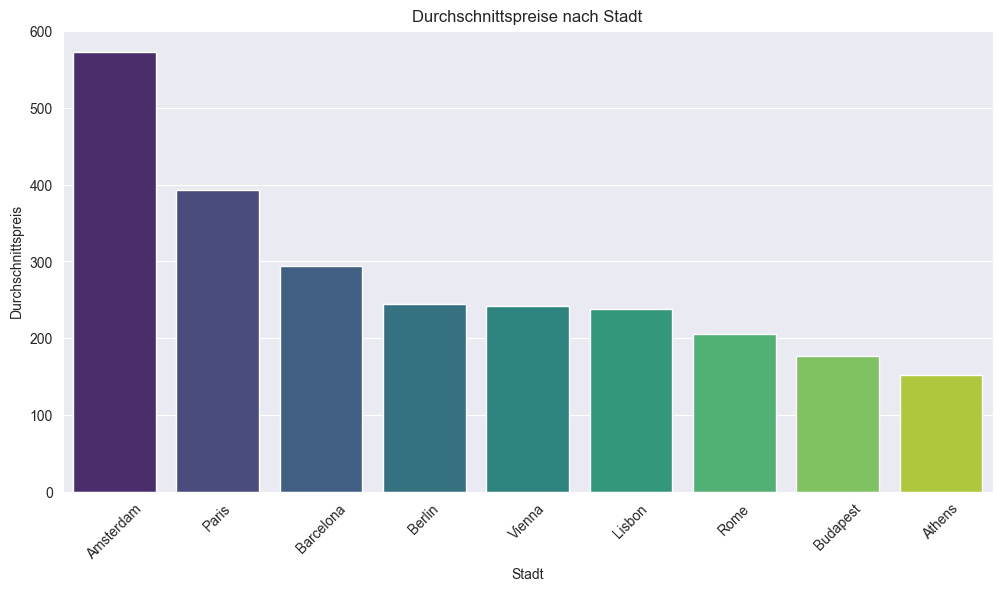

Durchschnittspreise nach Stadt:
Amsterdam: 573.11 €
Athens: 151.74 €
Barcelona: 293.75 €
Berlin: 244.58 €
Budapest: 176.51 €
Lisbon: 238.21 €
Paris: 392.53 €
Rome: 205.39 €
Vienna: 241.58 €
In der Stadt Athens gibt es die besten Bewertungen mit einer durchschnittlichen Zufriedenheit von 95.00.


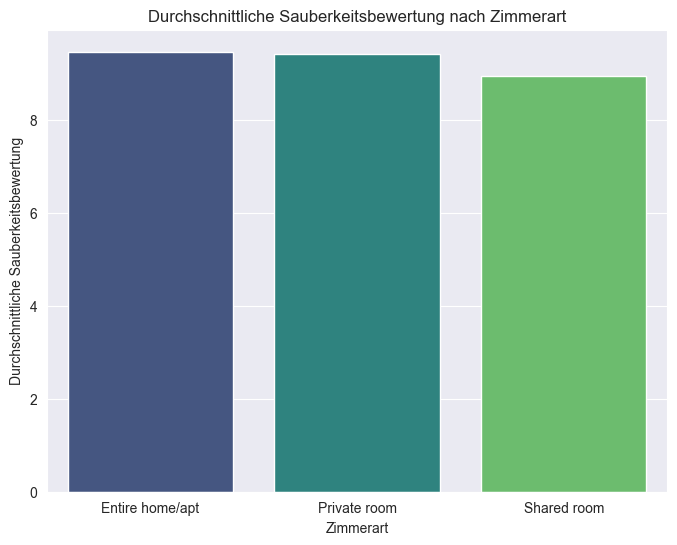

Durchschnittliche Sauberkeitsbewertung nach Zimmerart:
Entire home/apt: 9.46
Private room: 9.41
Shared room: 8.94


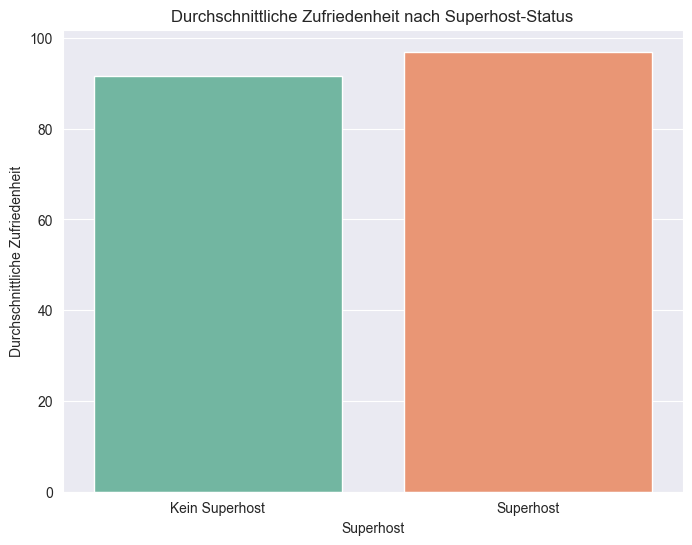

Durchschnittliche Zufriedenheit nach Superhost-Status:
Kein Superhost: 91.62
Superhost: 96.92


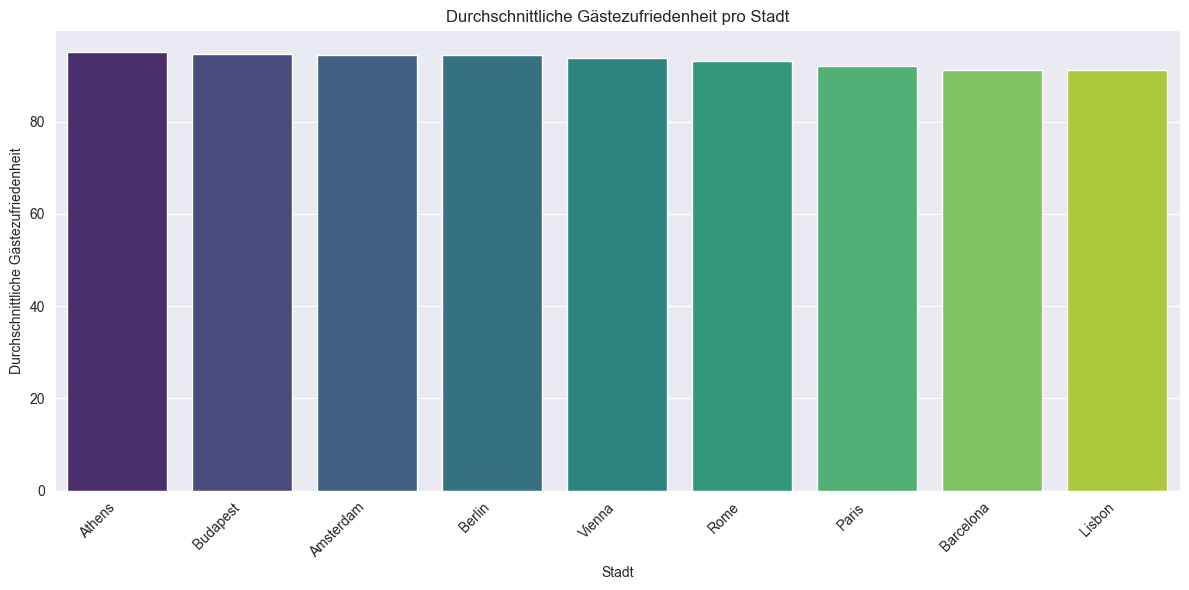

Durchschnittliche Gästezufriedenheit pro Stadt (nach Größe sortiert):
Athens: 95.00
Budapest: 94.59
Amsterdam: 94.51
Berlin: 94.32
Vienna: 93.73
Rome: 93.12
Paris: 92.04
Barcelona: 91.11
Lisbon: 91.09


<Figure size 640x480 with 0 Axes>

In [40]:
# Durchschnittspreise nach Stadt berechnen
avg_price_by_city = df.groupby('City')['Price'].mean()

# Durchschnittliche Sauberkeitsbewertung nach Zimmerart berechnen
avg_cleanliness_by_room = df.groupby('Room Type')['Cleanliness Rating'].mean()

# Durchschnittliche Zufriedenheit pro Stadt berechnen
avg_satisfaction_by_city = df.groupby('City')['Guest Satisfaction'].mean()

# Stadt mit der höchsten Zufriedenheit finden
city_with_highest_satisfaction = avg_satisfaction_by_city.idxmax()

# Durchschnittliche Zufriedenheit nach Superhost-Status
average_satisfaction_by_superhost = df.groupby('Superhost')['Guest Satisfaction'].mean()

# Balkendiagramm der Durchschnittspreise nach Stadt (nach Größe geordnet)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_city.sort_values(ascending=False).index, y=avg_price_by_city.sort_values(ascending=False).values, palette='viridis')
plt.title('Durchschnittspreise nach Stadt')
plt.xlabel('Stadt')
plt.ylabel('Durchschnittspreis')
plt.xticks(rotation=45)
plt.show()

print("Durchschnittspreise nach Stadt:")
for city, avg_price in avg_price_by_city.items():
    print(f"{city}: {avg_price:.2f} €")

highest_satisfaction = avg_satisfaction_by_city.max()
print(f"In der Stadt {city_with_highest_satisfaction} gibt es die besten Bewertungen mit einer durchschnittlichen Zufriedenheit von {highest_satisfaction:.2f}.")

# Balkendiagramm der durchschnittlichen Sauberkeitsbewertung nach Zimmerart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_cleanliness_by_room.index, y=avg_cleanliness_by_room.values, palette='viridis')
plt.title('Durchschnittliche Sauberkeitsbewertung nach Zimmerart')
plt.xlabel('Zimmerart')
plt.ylabel('Durchschnittliche Sauberkeitsbewertung')
plt.show()

print("Durchschnittliche Sauberkeitsbewertung nach Zimmerart:")
for room_type, avg_cleanliness in avg_cleanliness_by_room.items():
    print(f"{room_type}: {avg_cleanliness:.2f}")

# Balkendiagramm der Zufriedenheit nach Superhost-Status
plt.figure(figsize=(8, 6))
sns.barplot(x=average_satisfaction_by_superhost.index, y=average_satisfaction_by_superhost.values, palette='Set2')
plt.xlabel('Superhost')
plt.ylabel('Durchschnittliche Zufriedenheit')
plt.title('Durchschnittliche Zufriedenheit nach Superhost-Status')
plt.xticks([0, 1], ['Kein Superhost', 'Superhost'])
plt.show()

print("Durchschnittliche Zufriedenheit nach Superhost-Status:")
for superhost, avg_satisfaction in average_satisfaction_by_superhost.items():
    superhost_status = "Superhost" if superhost else "Kein Superhost"
    print(f"{superhost_status}: {avg_satisfaction:.2f}")

# Balkendiagramm der durchschnittlichen Gästezufriedenheit pro Stadt (nach Größe geordnet)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_satisfaction_by_city.sort_values(ascending=False).index, y=avg_satisfaction_by_city.sort_values(ascending=False).values, palette='viridis')
plt.xlabel('Stadt')
plt.ylabel('Durchschnittliche Gästezufriedenheit')
plt.title('Durchschnittliche Gästezufriedenheit pro Stadt')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Durchschnittliche Gästezufriedenheit pro Stadt (nach Größe sortiert):")
for city in avg_satisfaction_by_city.sort_values(ascending=False).index:
    avg_satisfaction = avg_satisfaction_by_city[city]
    print(f"{city}: {avg_satisfaction:.2f}")

plt.tight_layout()
plt.show()

# Zusätzliche Korrelationsanalysen

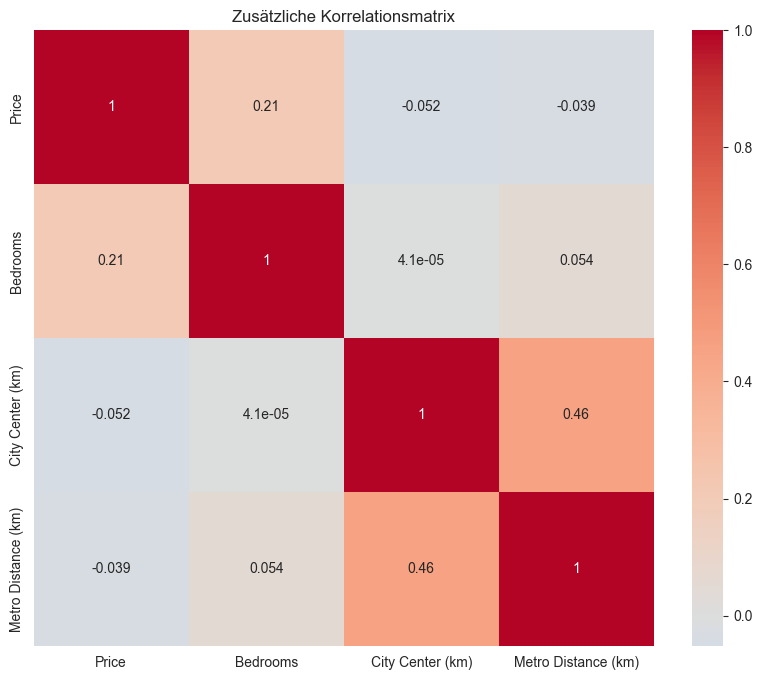

In [41]:
correlation_matrix_additional = df[['Price', 'Bedrooms', 'City Center (km)', 'Metro Distance (km)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_additional, annot=True, cmap='coolwarm', center=0)
plt.title('Zusätzliche Korrelationsmatrix')
plt.show()

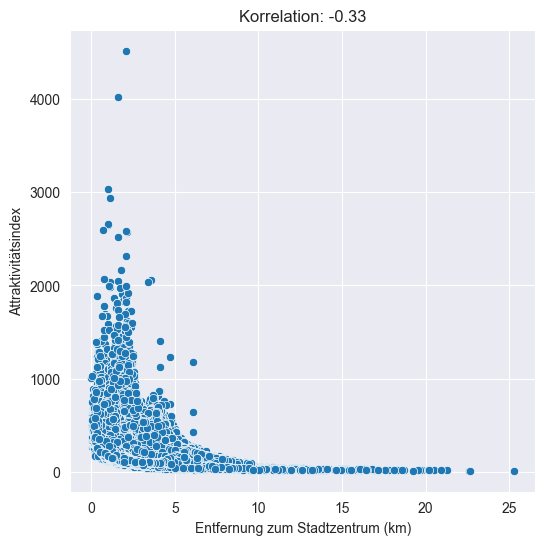

In [42]:
# Korrelation zwischen Attraktivität und Entfernung zum Stadtzentrum
correlation_attraction_distance = df['Attraction Index'].corr(df['City Center (km)'])

plt.figure(figsize=(6, 6))
sns.scatterplot(x='City Center (km)', y='Attraction Index', data=df)
plt.xlabel('Entfernung zum Stadtzentrum (km)')
plt.ylabel('Attraktivitätsindex')
plt.title(f'Korrelation: {correlation_attraction_distance:.2f}')
plt.show()

# Zufriedenheit der Nutzer in Beug auf versch. Faktoren

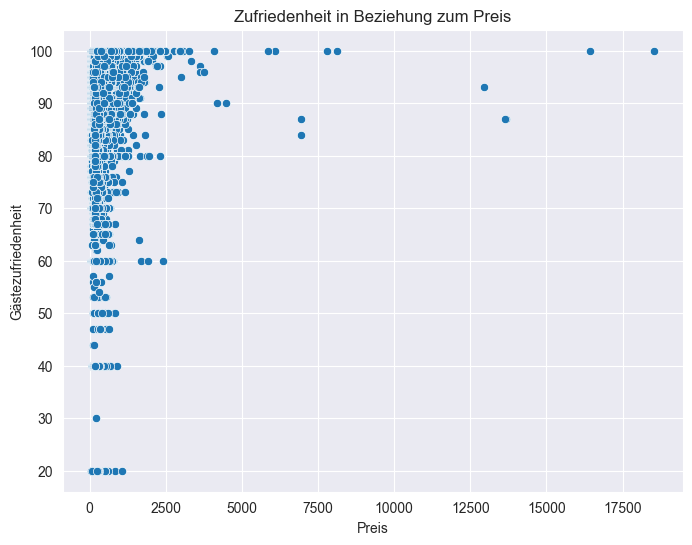

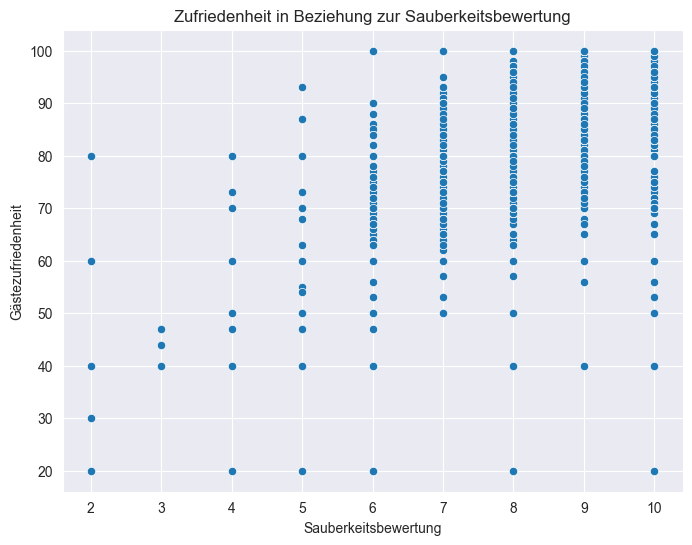

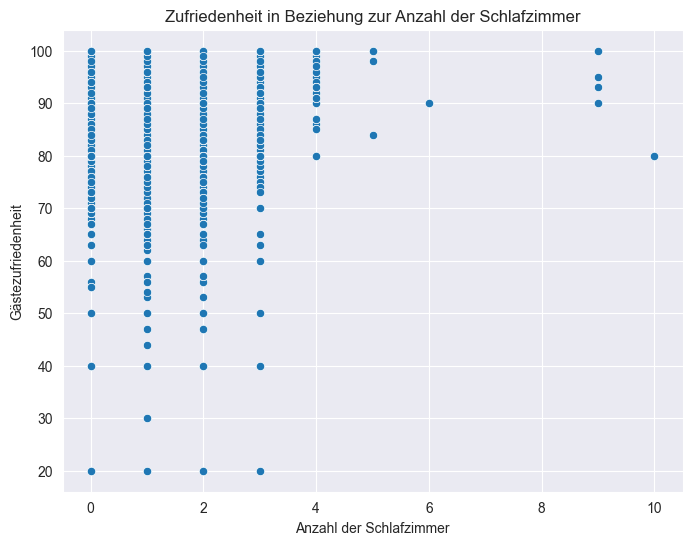

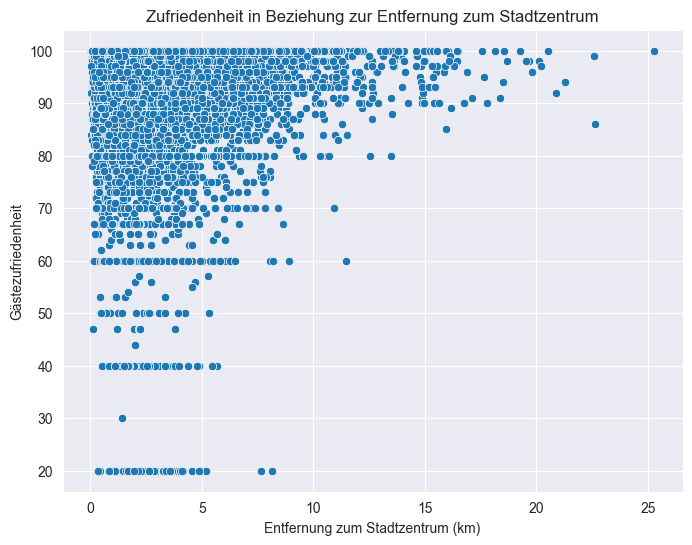

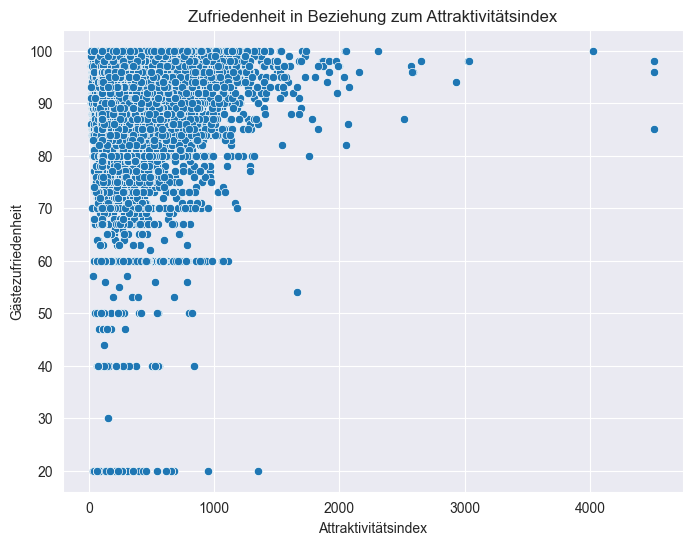

In [43]:
# Scatterplot der Zufriedenheit in Beziehung zum Preis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Guest Satisfaction', data=df)
plt.xlabel('Preis')
plt.ylabel('Gästezufriedenheit')
plt.title('Zufriedenheit in Beziehung zum Preis')
plt.show()

# Scatterplot der Zufriedenheit in Beziehung zur Sauberkeitsbewertung
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cleanliness Rating', y='Guest Satisfaction', data=df)
plt.xlabel('Sauberkeitsbewertung')
plt.ylabel('Gästezufriedenheit')
plt.title('Zufriedenheit in Beziehung zur Sauberkeitsbewertung')
plt.show()

# Scatterplot der Zufriedenheit in Beziehung zur Anzahl der Schlafzimmer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bedrooms', y='Guest Satisfaction', data=df)
plt.xlabel('Anzahl der Schlafzimmer')
plt.ylabel('Gästezufriedenheit')
plt.title('Zufriedenheit in Beziehung zur Anzahl der Schlafzimmer')
plt.show()

# Scatterplot der Zufriedenheit in Beziehung zur Entfernung zum Stadtzentrum
plt.figure(figsize=(8, 6))
sns.scatterplot(x='City Center (km)', y='Guest Satisfaction', data=df)
plt.xlabel('Entfernung zum Stadtzentrum (km)')
plt.ylabel('Gästezufriedenheit')
plt.title('Zufriedenheit in Beziehung zur Entfernung zum Stadtzentrum')
plt.show()

# Scatterplot der Zufriedenheit in Beziehung zum Attraktivitätsindex
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attraction Index', y='Guest Satisfaction', data=df)
plt.xlabel('Attraktivitätsindex')
plt.ylabel('Gästezufriedenheit')
plt.title('Zufriedenheit in Beziehung zum Attraktivitätsindex')
plt.show()



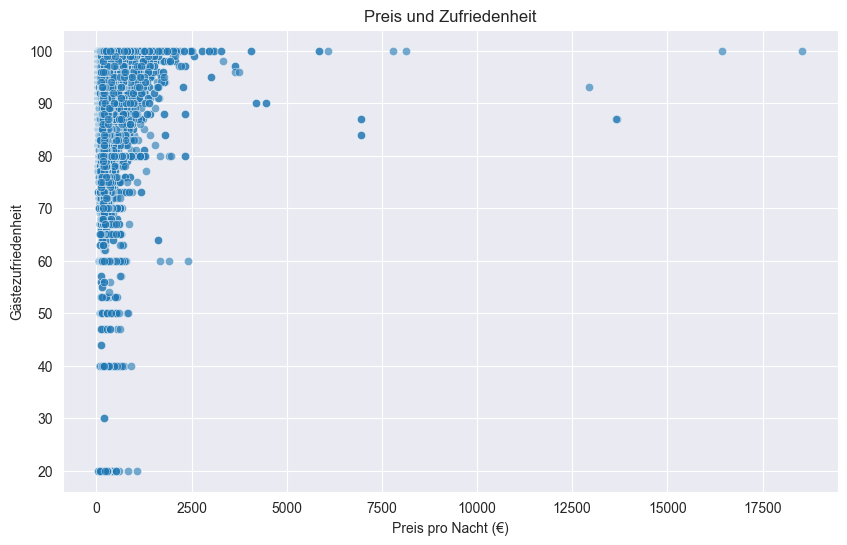

Durchschnittliche Zufriedenheit nach Preisbereichen:
(0, 100]: 92.38
(100, 200]: 93.18
(200, 300]: 93.14
(300, 400]: 93.06
(400, 500]: 92.70
(500, 600]: 93.26
(600, 700]: 92.62


In [44]:
# Streudiagramm Preis vs. Zufriedenheit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Guest Satisfaction', alpha=0.6)
plt.title('Preis und Zufriedenheit')
plt.xlabel('Preis pro Nacht (€)')
plt.ylabel('Gästezufriedenheit')
plt.show()

# Durchschnittliche Zufriedenheit nach Preisbereichen
price_bins = [0, 100, 200, 300, 400, 500, 600, 700]
df['Price Bin'] = pd.cut(df['Price'], bins=price_bins)
avg_satisfaction_by_price_bin = df.groupby('Price Bin')['Guest Satisfaction'].mean()

print("Durchschnittliche Zufriedenheit nach Preisbereichen:")
for price_bin, avg_satisfaction in avg_satisfaction_by_price_bin.items():
    print(f"{price_bin}: {avg_satisfaction:.2f}")